# Problema 1. Binario 16 a entero

Cree una función llamada myint pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con int(0b1000011100001)

In [8]:
def myint(num):
    '''
    Combierte un numero entero a binario

    entrada:

    num: numero entero que se va a combertir

    salidas:

    nume: numero combertido en binario
    '''
    nume = 0

    num = num[::-1]

    for i in range(len(num)):
        if num[i] == '1':
            nume += 2 ** i

    return(nume)


myint('0001000011100001')

4321

In [9]:
int(0b0001000011100001)

4321

# Problema 2. Binario 64 a float

In [10]:
def myfloat(num):
    '''
    Combierte un numero decimal desde 0. a binario

    entrada:

    num: numero decimal que se va a combertir

    salidas:

    nume: numero combertido en binario
    '''
    num = str(num)
    nume = 0

    for i in range(0,len(num)):
        if num[i] == '1':
            nume += 2 ** -(i+1)

    return(nume)


def number64(n):
    '''
    Combierte un numero real a binario con el formato IEEE-754 de doble prsicion (64 bits)

    entrada:

    n: numero real que se va a combertir

    salidas:

    num: numero combertido en binario
    '''
    
    n = str(n)

    if len(n) != 64:
        raise RuntimeError('El numero debe ser de 64 bits')
    
    sesgo = 2**10 -1
    expReal = 0
    valor = 0

    signB = n[0]
    expoB = n[1:12]
    mantisa = '1'+n[12:]

    signo = '-' if signB == '1' else ''
    expReal = myint(expoB) - sesgo

    mantisaR = mantisa[0: expReal+1]
    mantisaF = mantisa[expReal+1:]
    
    partR = myint(mantisaR)
    partF = myfloat(mantisaF)

    num = partR + partF

    return num


number64('0100000000111011100100001111111111111111111111111111111111111111')

27.566406249999996

# Problema 3. Aproximacion de $π$

La serie de Maclaurin para la función tangente inversa converge en $−1<x≤1$
 y está dada por:


$$arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^{n} \frac{(-1)^{i+1} x^{2i-1}}{2i - 1}$$


* Aproximación básica

    - Utilizando el hecho de que $tan(π/4)=1$
    , implemente en Python una función que calcule $4Pn(1)$
    y determina el número mínimo de términos n
    necesarios para que $|4Pn(1)−π|<10^{−3}$
    . Compare su resultado con el valor de π
    de la librería math.
    - Requiriendo que el valor de π
    esté dentro de un error de $10^{−4}$
    . ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.

* Mejora de la convergencia El método anterior puede mejorarse significativamente usando la identidad:

$$\frac{π}{4}=arctan(\frac{1}{2})+arctan(\frac{1}{3})$$

Implemente en Python una función que evalúe la serie para $arctan(1/2)$
y $arctan(1/3)$
por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar π
con un error menor a $10^{−3}
y 10^{−6}$
.

* Método de alta precisión Para obtener una convergencia aún más rápida, usamos la identidad:
$$\frac{π}{4}=arctan(\frac{1}{5})−arctan(\frac{1}{239})$$

Desarrolle un programa en Python que implemente esta fórmula y determine:

- El número mínimo de términos necesarios en cada serie para aproximar $π$
    con error menor a $10^{−3}$
    y $10^{−6}$.
- Compare el rendimiento (número de términos requeridos) con los métodos anteriores.

In [11]:
import math as mt

def arctan1( tol= 1e-4, n=100000):
    '''
    Calcula el valor del arctan(1) usando la serie de Maclaurin para una aproximacion basica y como criterio de tolerancia, usa el valor de pi

    entradas:

    theta: valor a evaluar
    tol: tolerancia 
    n: iteraciones maximas

    salidas:

    arctanX: valor del arctang(theta)
    nterminos: terminos empleados para el calculo
    '''

    nTermino = 1

    arctanX = 0
    termAnt = arctanX
    for i in range(1, n+1):

        nTermino = i

        termAnt = arctanX
        termAct = ((-1)**(i+1) * (1**(2*i - 1))/(2*i - 1 ))
        arctanX += termAct

        if (abs(4*arctanX - mt.pi) < tol):
            
            return arctanX, nTermino
    
    raise RuntimeError('Limite de iteraciones alcanzado')

In [12]:
arctanX1, n1 = arctan1(1e-4, 100000)

if type(arctanX1) != str:
    print(f'El valor del arctangente de 1 es {arctanX1}, con n = {n1}\nEl error el pi es {abs(4*arctanX1 - mt.pi)}')
else:
    print(arctanX1)

El valor del arctangente de 1 es 0.7853731633975086, con n = 10000
El error el pi es 9.99999997586265e-05


In [13]:
def arctanxE(x, tol= 1e-3, n=10000):
    '''
    Calcula el valor del arctan(theha) usando la serie de Maclaurin para una aproximacion basica

    entradas:

    theta: valor a evaluar
    tol: tolerancia 
    n: iteraciones maximas

    salidas:

    arctanX: valor del arctang(theta)
    i: terminos empleados para el calculo
    '''

    termAnt = 0
    arctanX = 0
    for i in range(1, n+1):

        term = (-1)**(i+1) * (x**(2*i-1))/(2*i -1)
        arctanX += term      
        if abs(term - termAnt) < tol:
            return arctanX, i
            
        termAnt = term

def arctanXPi(theta1, theta2, tol= 1e-3, n= 1000, mejConv= False, mejPres= False ):
    '''
    Calcula el valor de pi usando la serie de Maclaurin de theta1 y theta2 usando 2 mejoras de presicion distintas 

    entradas:

    theta1: primer valor para sumar
    theta2: segundo valor para sumar
    tol: tolerancia general para encontrar pi
    n: iteraciones maximas

    salidas:

    pi: valor de pi calculado
    n1: terminos usados para encontrar el valor de arctan(theta1)
    n2: terminos usados para encontrar el valor de arctan(theta2)
    '''

    tolTheta = 1
    expTol = 1

    pi = 0
    piReal = mt.pi

    
    while True:
    
        x1, n1 = arctanxE(theta1, tolTheta)
        x2, n2 = arctanxE(theta2, tolTheta)

        if mejConv:
            pi = 4*(x1+x2)

            if abs(piReal - pi) < tol:

                return pi, n1, n2
        
        if mejPres:
    

            pi = 4*(4*x1 - x2)

            if abs(piReal - pi) < tol:
                return pi, n1, n2
        
        tolTheta *= 10**(-expTol)

Mejora de convergencia

In [14]:
theta1 = 1/2
theta2 = 1/3

pi1, itTheta1, itTheta2 = arctanXPi(theta1, theta2, 1e-3, mejConv= True)
pi2, itTheta1_2, itTheta2_2 = arctanXPi(theta1, theta2, 1e-6, mejConv= True)

print(f'Para aproximar el valor de pi con un error de {1e-3} se usaron {itTheta1} terminos para arctan(1/2) y {itTheta2} terminos para arctan(1/3)\nEl valor optenido fue de: {pi1}\n')
print(f'Para aproximar el valor de pi con un error de {1e-6} se usaron {itTheta1_2} terminos para arctan(1/2) y {itTheta2_2} terminos para arctan(1/3)\nEl valor optenido fue de: {pi2}')

Para aproximar el valor de pi con un error de 0.001 se usaron 4 terminos para arctan(1/2) y 4 terminos para arctan(1/3)
El valor optenido fue de: 3.1408505617610554

Para aproximar el valor de pi con un error de 1e-06 se usaron 9 terminos para arctan(1/2) y 6 terminos para arctan(1/3)
El valor optenido fue de: 3.1415928051045654


Mejora de alta presicion

In [15]:
theta1 = 1/5
theta2 = 1/239

pi1, itTheta1, itTheta2 = arctanXPi(theta1, theta2, 1e-3, mejPres= True)
pi2, itTheta1_2, itTheta2_2 = arctanXPi(theta1, theta2, 1e-6, mejPres= True)

print(f'Para aproximar el valor de pi con un error de {1e-3} se usaron {itTheta1} terminos para arctan(1/2) y {itTheta2} terminos para arctan(1/3)\nEl valor optenido fue de: {pi1}\n')
print(f'Para aproximar el valor de pi con un error de {1e-6} se usaron {itTheta1_2} terminos para arctan(1/2) y {itTheta2_2} terminos para arctan(1/3)\nEl valor optenido fue de: {pi2}')

Para aproximar el valor de pi con un error de 0.001 se usaron 3 terminos para arctan(1/2) y 1 terminos para arctan(1/3)
El valor optenido fue de: 3.1416209316596935

Para aproximar el valor de pi con un error de 1e-06 se usaron 4 terminos para arctan(1/2) y 3 terminos para arctan(1/3)
El valor optenido fue de: 3.1415917721821773


# Problema 4. Serie exponencial

Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [28]:
import numpy as np
from math import factorial

def exp(x, tol= 1e-7):
    
    suma = 0
    n = 0

    terminos = []
    
    while True:

        terAct = (x)**n/ factorial(n)
        terSig = (x)**n/ factorial(n)

        suma += terAct

        terminos.append(terAct)

        if abs(terSig) <= tol * suma:
            return suma, n, terminos
        
        n += 1



a)

In [29]:
x = -0.5
expo, it, terminos = exp(x)
expoReal = np.exp(x)

print(f'Se usaron {it} terminos para calcular el valor de {x}\nSu valor real es {expoReal}\nEl metodo tubo un error del {100 * abs(expo - expoReal) / expoReal}%')      

Se usaron 9 terminos para calcular el valor de -0.5
Su valor real es 0.6065306597126334
El metodo tubo un error del 4.2433599295534946e-08%


b)

In [18]:
x = -10
expom10, it, terminos = exp(x)
cancelacion = terminos[9:11]

print(f'para x = {x}, e^x = {expom10} se ve una cancelacion casi perfecta en los terminos 9 y 10\nn9: {cancelacion[0]}\n10: {cancelacion[1]}')

para x = -10, e^x = 4.539992975340805e-05 se ve una cancelacion casi perfecta en los terminos 9 y 10
n9: -2755.731922398589
10: 2755.731922398589


c)

In [19]:
#Usando x= -10
x = 10

expom2,_,_ = exp(-x)
expo2,_,_ = exp(x)
expom2Exp = 1/expo2

expReal = np.exp(-x)

errPorExpo2 = 100*abs(expom2Exp - expoReal) / expoReal
errPorExpom2 = 100*abs(expom2 - expoReal) / expoReal

print(f'El valor real para x = {-x}: {expReal}')
print(f'El metodo diseñado para x = {-x}: {expom2}; Con un error de {errPorExpom2}% ')
print(f'El metodo usando x = {x} y e^-x = 1/e^x: {expom2Exp}; con un error de {errPorExpo2}%\n')

if errPorExpo2 < errPorExpom2:
    print(f'La aproximacion con e^-x = 1/e^x es mejor por: {errPorExpom2-errPorExpo2}%')

El valor real para x = -10: 4.5399929762484854e-05
El metodo diseñado para x = -10: 4.539992975340805e-05; Con un error de 99.9876590195938% 
El metodo usando x = 10 y e^-x = 1/e^x: 4.539993088050151e-05; con un error de 99.98765901928742%

La aproximacion con e^-x = 1/e^x es mejor por: 3.063860276597552e-10%


d)

In [38]:
for x in range(1, 11):
    expoReal = np.exp(-x)

    expo, n, _ = exp(-x)
    errExp = 100 * abs(expo - expoReal) / expoReal

    print(f'Para N= {n} y x= {x}, el calculo fue de: {expo}\nEl error fue del {errExp}%\n')

Para N= 11 y x= 1, el calculo fue de: 0.367879439233606
El error fue del 5.267585298245134e-07%

Para N= 16 y x= 2, el calculo fue de: 0.1353352835680879
El error fue del 2.449288910218517e-07%

Para N= 20 y x= 3, el calculo fue de: 0.04978706854792016
El error fue del 3.6165257143603056e-07%

Para N= 24 y x= 4, el calculo fue de: 0.018315638951600335
El error fue del 3.4323758568674935e-07%

Para N= 28 y x= 5, el calculo fue de: 0.00673794701713178
El error fue del 2.6783102791584506e-07%

Para N= 31 y x= 6, el calculo fue de: 0.002478752151089874
El error fue del 1.031829028631722e-06%

Para N= 35 y x= 7, el calculo fue de: 0.0009118819595757116
El error fue del 6.556555471824813e-07%

Para N= 39 y x= 8, el calculo fue de: 0.00033546262649068287
El error fue del 4.208602895290849e-07%

Para N= 42 y x= 9, el calculo fue de: 0.00012340980549148013
El error fue del 1.1383216880948904e-06%

Para N= 46 y x= 10, el calculo fue de: 4.539992975340805e-05
El error fue del 1.9992993624138782e-

In [21]:
for x in range(10, 101):
    expoReal = np.exp(-x)

    expo, n, _ = exp(-x)
    errExp = 100 * abs(expo - expoReal) / expoReal

    print(f'Para N= {n} y x= {x}, el calculo fue de: {expo}\nEl error fue del {errExp}%\n')

Para N= 46 y x= 10, el calculo fue de: 4.539992975340805e-05
El error fue del 1.9992993624138782e-08%

Para N= 50 y x= 11, el calculo fue de: 1.6701702136331296e-05
El error fue del 8.059572220015312e-06%

Para N= 53 y x= 12, el calculo fue de: 6.1442126054441445e-06
El error fue del 4.10330763715497e-06%

Para N= 57 y x= 13, el calculo fue de: 2.260327817662375e-06
El error fue del 7.031358679180167e-05%

Para N= 60 y x= 14, el calculo fue de: 8.31532671336775e-07
El error fue del 0.0004752972586954823%

Para N= 64 y x= 15, el calculo fue de: 3.0593423939824367e-07
El error fue del 0.010434342690019827%

Para N= 68 y x= 16, el calculo fue de: 1.1254294253236479e-07
El error fue del 0.006902564575968191%

Para N= 71 y x= 17, el calculo fue de: 4.182439179322809e-08
El error fue del 1.026620771244694%

Para N= 75 y x= 18, el calculo fue de: 1.4601275694483674e-08
El error fue del 4.128068853454785%

Para N= 79 y x= 19, el calculo fue de: 2.902384978187694e-09
El error fue del 48.1975650

KeyboardInterrupt: 

Se puede ver que a partir de x =  21, la serie ya no converge, a parte de eso, luego de x= 14 la presicion se empieza a perder

e)

In [22]:
import matplotlib.pyplot as plt

In [79]:
def expErr(x, N):
    
    suma = 0
    expReal = np.exp(x)

    for n in range(N+1):

        terAct = (x)**n/ factorial(n)

        suma += terAct

        terminos.append(terAct)

    errRel = abs(suma-expReal)/expoReal

    return suma, errRel


1
2
3
4
5
6


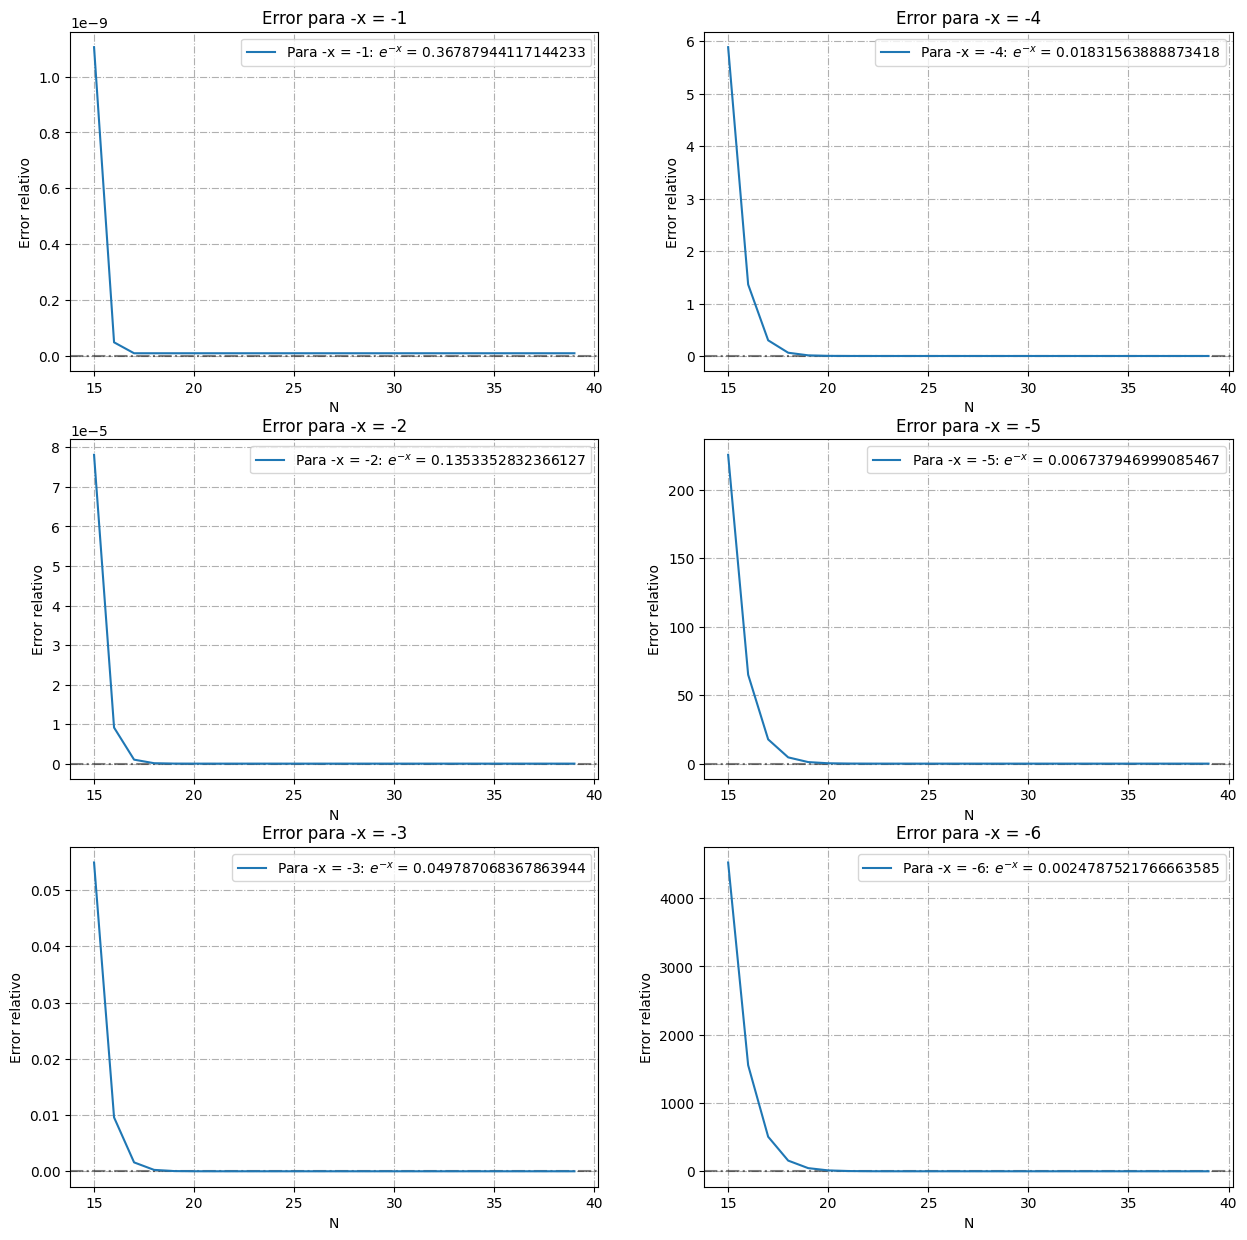

In [118]:
fig, axs = plt.subplots(3, 2, figsize= (15,15))

N = np.arange(15, 40)

for x in range(1, 7):
    print(x)
    error = []
    expReal = np.exp(-x)

    for n in N:

        _, errN = expErr(x, n)

        error.append(errN)

    if x-1 < 3:
        axs[x-1,0].axhline(0.0, color='black', alpha= 0.5, linestyle= '-.')

        axs[x-1, 0].plot(N, error, label= f'Para -x = {-x}: $e^{{-x}}$ = {expReal}')

        axs[x-1,0].set_title(f'Error para -x = {-x}')

        axs[x-1,0].set_xlabel('N')
        axs[x-1,0].set_ylabel('Error relativo')

        axs[x-1,0].grid(linestyle= '-.')
        axs[x-1,0].legend()
    elif x-1 >= 3:
        axs[x-4, 1].axhline(0.0, color='black', alpha= 0.5, linestyle= '-.')

        axs[x-4, 1].plot(N, error, label= f'Para -x = {-x}: $e^{{-x}}$ = {expReal}')

        axs[x-4,1].set_title(f'Error para -x = {-x}')

        axs[x-4,1].set_xlabel('N')
        axs[x-4,1].set_ylabel('Error relativo')

        axs[x-4,1].grid(linestyle= '-.')
        axs[x-4,1].legend()

